#  Adagrad optimizer

Adagrad (Adaptive Gradient Algorithm) is an optimization algorithm commonly used in training artificial neural networks (ANNs). It dynamically adjusts the learning rates of each parameter based on the historical gradients. 

## Details of Adagrad Algorithm

Adagrad is designed to adaptively adjust the learning rates for each parameter during training. It achieves this by scaling the learning rates based on the historical gradients of each parameter. Here's how Adagrad works:

1. Compute Squared Gradients: Adagrad maintains a sum of the squared gradients for each parameter.

2. Adapt Learning Rates: It divides the learning rate by the square root of the sum of squared gradients for each parameter. This effectively reduces the learning rate for parameters that have large gradients and increases it for parameters that have small gradients.

3. Accumulation of Gradients: Adagrad accumulates the squared gradients over time, so the learning rates decrease monotonically during training.

## Pros of Adagrad optimizer

1. Adaptive Learning Rates: Adagrad adapts the learning rates for each parameter individually based on the historical gradients. This can help converge faster and more efficiently, especially for sparse data or when dealing with features that occur infrequently.

2. No Manual Tuning of Learning Rate: Adagrad automatically adjusts the learning rates based on the gradients, reducing the need for manual tuning of learning rate hyperparameters.

## Cons of Adagrad optimizer

1. Decreasing Learning Rates: Adagrad's accumulation of squared gradients can lead to learning rates that decrease too aggressively over time. This can cause the learning process to slow down prematurely, especially for deep neural networks.

2. Memory Usage: Adagrad needs to store and update the sum of squared gradients for each parameter, which can lead to increased memory usage, especially for models with many parameters.

3. RMSprop and AdaDelta: While Adagrad was one of the early adaptive learning rate algorithms, more recent algorithms like RMSprop and AdaDelta have been developed to address some of its shortcomings, such as the aggressive decrease in learning rates.

In [1]:
from fashionmnist_model import FMM
import tensorflow as tf

In [2]:
# Load and preprocess the data
X_train, y_train, X_test, y_test = FMM.load_data()

In [3]:
# Reshape the data
X_train, X_test = FMM.reshape_data(X_train, X_test)

In [4]:
optimizer = tf.keras.optimizers.Adagrad()
model = FMM.create_model_v1()
print(f"Training with {optimizer.__class__.__name__} optimizer...")
history = FMM.compile_and_train(
    model, X_train, y_train, optimizer
)

Training with Adagrad optimizer...
Epoch 1/30


2024-02-22 21:57:09.065724: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


750/750 [==============================] - 5s 6ms/step - loss: 1.4012 - accuracy: 0.6113 - val_loss: 0.9585 - val_accuracy: 0.7139
Epoch 2/30
750/750 [==============================] - 5s 6ms/step - loss: 0.8427 - accuracy: 0.7339 - val_loss: 0.7513 - val_accuracy: 0.7558
Epoch 3/30
750/750 [==============================] - 5s 7ms/step - loss: 0.7126 - accuracy: 0.7694 - val_loss: 0.6698 - val_accuracy: 0.7853
Epoch 4/30
750/750 [==============================] - 6s 7ms/step - loss: 0.6474 - accuracy: 0.7932 - val_loss: 0.6222 - val_accuracy: 0.7992
Epoch 5/30
750/750 [==============================] - 5s 7ms/step - loss: 0.6068 - accuracy: 0.8043 - val_loss: 0.5916 - val_accuracy: 0.8082
Epoch 6/30
750/750 [==============================] - 5s 7ms/step - loss: 0.5781 - accuracy: 0.8118 - val_loss: 0.5677 - val_accuracy: 0.8151
Epoch 7/30
750/750 [==============================] - 5s 7ms/step - loss: 0.5571 - accuracy: 0.8175 - val_loss: 0.5503 - val_accuracy: 0.8196
Epoch 8/30
750/75

313/313 - 1s - loss: 0.4545 - accuracy: 0.8422 - 1s/epoch - 4ms/step

Training accuracy : 0.8559583425521851
Validation accuracy : 0.8475000262260437
Loss : 0.45453017950057983
Accuracy : 0.842199981212616



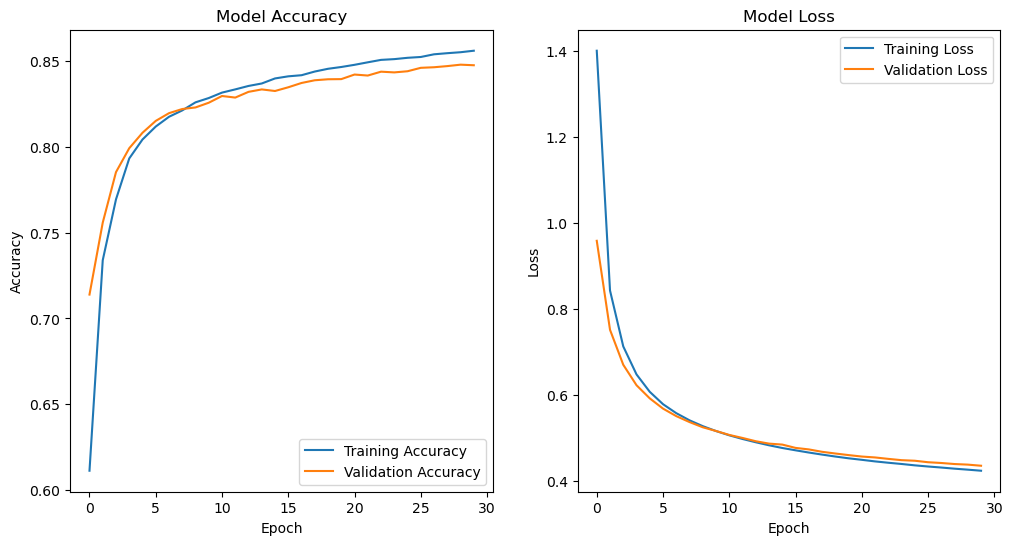

In [5]:
FMM.evaluate(model, X_test, y_test, history)
FMM.plot_history(history)

# Hyperparameter tunning

In [6]:
# Hyperparameter tunning

In [7]:
import ray
from ray import tune, train

In [8]:
ray.init()

2024-02-22 22:00:07,537	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Python version:,3.11.5
Ray version:,2.9.2
Dashboard:,http://127.0.0.1:8265


In [9]:
# Define a function to train the model
def train_model(config):
    from fashionmnist_model import FMM
    import tensorflow as tf
    
    X_train, y_train, X_test, y_test = FMM.load_data()
    X_train, X_test = FMM.reshape_data(X_train, X_test)

    optimizer = tf.keras.optimizers.Adagrad(
        learning_rate=config["learning_rate"],
        # epsilon=config["epsilon"],
    )

    model = FMM.create_model_v1()
    history = FMM.compile_and_train(
        model, X_train, y_train, optimizer
    )
    
    loss, accuracy, _, _ = FMM.evaluate(model, X_test, y_test, history)

    train.report({"accuracy": accuracy, "loss": loss, **config})

In [10]:
search_space = {
    "learning_rate": tune.grid_search([0.01, 0.001, 0.0001]),
    # "epsilon": tune.grid_search([1e-8, 1e-9, 1e-10]),
}

In [11]:
# Run hyperparameter tuning
analysis = tune.run(
    train_model,
    config=search_space,
    metric="accuracy",
    mode="max",
)

2024-02-22 22:00:11,743	INFO tune.py:583 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949
(raylet) [2024-02-22 22:00:16,446 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 8933634048; capacity: 245107195904. Object creation will fail if spilling is required.


(raylet) [2024-02-22 22:00:26,457 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 8930394112; capacity: 245107195904. Object creation will fail if spilling is required.
(raylet) [2024-02-22 22:00:36,500 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 8929583104; capacity: 245107195904. Object creation will fail if spilling is required.
(train_model pid=77688) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adagrad` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adagrad`.
(train_model pid=77688) WARNING:absl:There is a known slowdown when using v2.11+ Keras optimizers on M1/M2 Macs. Falling back to the legacy Keras optimizer, i.e., `tf.keras.optimizers.legacy.Adagrad`.
(train_model pid=77688) 2024-02-22 22:00:43.451119: W te

(train_model pid=77688) Epoch 1/30
 29/750 [>.............................] - ETA: 10s - loss: 1.7152 - accuracy: 0.4650


(raylet) [2024-02-22 22:00:46,518 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 8928317440; capacity: 245107195904. Object creation will fail if spilling is required.


 91/750 [==>...........................] - ETA: 8s - loss: 1.2558 - accuracy: 0.6123


(train_model pid=77689) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adagrad` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adagrad`. [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(train_model pid=77689) WARNING:absl:There is a known slowdown when using v2.11+ Keras optimizers on M1/M2 Macs. Falling back to the legacy Keras optimizer, i.e., `tf.keras.optimizers.legacy.Adagrad`. [repeated 2x across cluster]


194/750 [======>.......................] - ETA: 7s - loss: 1.0119 - accuracy: 0.6721
(train_model pid=77689) Epoch 1/30 [repeated 2x across cluster]
750/750 [==============================] - 13s 13ms/step - loss: 0.6852 - accuracy: 0.7711 - val_loss: 0.5219 - val_accuracy: 0.8186
(train_model pid=77688) Epoch 2/30
 43/750 [>.............................] - ETA: 4s - loss: 0.4874 - accuracy: 0.8336


(train_model pid=77689) 2024-02-22 22:00:47.484176: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz [repeated 2x across cluster]
(raylet) [2024-02-22 22:00:56,520 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 7853334528; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 11s 12ms/step - loss: 1.3243 - accuracy: 0.6087 - val_loss: 0.9095 - val_accuracy: 0.7158 [repeated 2x across cluster]
(train_model pid=77689) Epoch 2/30 [repeated 2x across cluster]
750/750 [==============================] - 8s 11ms/step - loss: 1.8854 - accuracy: 0.4622 - val_loss: 1.7715 - val_accuracy: 0.5211 [repeated 2x across cluster]
(train_model pid=77690) Epoch 3/30 [repeated 2x across cluster]
350/750 [=============>................] - ETA: 2s - loss: 0.4432 - accuracy: 0.8454


(raylet) [2024-02-22 22:01:06,520 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 7852171264; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 7s 9ms/step - loss: 0.4308 - accuracy: 0.8497 - val_loss: 0.4248 - val_accuracy: 0.8522 [repeated 2x across cluster]
(train_model pid=77688) Epoch 4/30 [repeated 2x across cluster]
750/750 [==============================] - 8s 10ms/step - loss: 0.7006 - accuracy: 0.7762 - val_loss: 0.6597 - val_accuracy: 0.7839 [repeated 2x across cluster]
(train_model pid=77689) Epoch 4/30 [repeated 2x across cluster]
314/750 [===========>..................] - ETA: 4s - loss: 1.5686 - accuracy: 0.5984


(raylet) [2024-02-22 22:01:16,528 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 7851450368; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 8s 10ms/step - loss: 1.5327 - accuracy: 0.6063 - val_loss: 1.4625 - val_accuracy: 0.6226 [repeated 2x across cluster]
(train_model pid=77690) Epoch 5/30 [repeated 2x across cluster]
623/750 [=======================>......] - ETA: 1s - loss: 1.4226 - accuracy: 0.6279


(raylet) [2024-02-22 22:01:26,628 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 7851028480; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 8s 10ms/step - loss: 0.6435 - accuracy: 0.7933 - val_loss: 0.6191 - val_accuracy: 0.7956
(train_model pid=77689) Epoch 5/30
750/750 [==============================] - 8s 10ms/step - loss: 0.3867 - accuracy: 0.8644 - val_loss: 0.3978 - val_accuracy: 0.8617
(train_model pid=77688) Epoch 6/30
750/750 [==============================] - 8s 10ms/step - loss: 0.6067 - accuracy: 0.8043 - val_loss: 0.5896 - val_accuracy: 0.8056 [repeated 2x across cluster]
(train_model pid=77689) Epoch 6/30 [repeated 2x across cluster]
584/750 [======================>.......] - ETA: 1s - loss: 0.5788 - accuracy: 0.8127 [repeated 2x across cluster]


(raylet) [2024-02-22 22:01:36,632 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 7850778624; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 7s 9ms/step - loss: 1.3241 - accuracy: 0.6411 - val_loss: 1.2771 - val_accuracy: 0.6508 [repeated 2x across cluster]
(train_model pid=77690) Epoch 7/30 [repeated 2x across cluster]
750/750 [==============================] - 8s 10ms/step - loss: 0.3593 - accuracy: 0.8737 - val_loss: 0.3809 - val_accuracy: 0.8666 [repeated 2x across cluster]
(train_model pid=77688) Epoch 8/30 [repeated 2x across cluster]
614/750 [=======================>......] - ETA: 1s - loss: 0.3492 - accuracy: 0.8751 [repeated 2x across cluster]


(raylet) [2024-02-22 22:01:46,726 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 7850262528; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 8s 10ms/step - loss: 0.5605 - accuracy: 0.8171 - val_loss: 0.5508 - val_accuracy: 0.8151 [repeated 2x across cluster]
(train_model pid=77689) Epoch 8/30 [repeated 2x across cluster]
750/750 [==============================] - 8s 10ms/step - loss: 1.1929 - accuracy: 0.6594 - val_loss: 1.1593 - val_accuracy: 0.6665 [repeated 2x across cluster]
(train_model pid=77690) Epoch 9/30 [repeated 2x across cluster]
519/750 [===================>..........] - ETA: 2s - loss: 1.1506 - accuracy: 0.6644


(raylet) [2024-02-22 22:01:56,824 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 7849066496; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 8s 11ms/step - loss: 0.5445 - accuracy: 0.8217 - val_loss: 0.5373 - val_accuracy: 0.8195
(train_model pid=77689) Epoch 9/30
750/750 [==============================] - 9s 12ms/step - loss: 0.3398 - accuracy: 0.8797 - val_loss: 0.3660 - val_accuracy: 0.8711
(train_model pid=77688) Epoch 10/30
750/750 [==============================] - 9s 12ms/step - loss: 0.5315 - accuracy: 0.8250 - val_loss: 0.5269 - val_accuracy: 0.8221 [repeated 2x across cluster]
(train_model pid=77689) Epoch 10/30 [repeated 2x across cluster]
550/750 [=====================>........] - ETA: 2s - loss: 1.1093 - accuracy: 0.6694


(raylet) [2024-02-22 22:02:06,924 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 6772379648; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 10s 13ms/step - loss: 0.3315 - accuracy: 0.8831 - val_loss: 0.3682 - val_accuracy: 0.8690
(train_model pid=77688) Epoch 11/30
750/750 [==============================] - 11s 14ms/step - loss: 1.1053 - accuracy: 0.6707 - val_loss: 1.0787 - val_accuracy: 0.6759
(train_model pid=77690) Epoch 11/30
750/750 [==============================] - 10s 13ms/step - loss: 0.5204 - accuracy: 0.8288 - val_loss: 0.5177 - val_accuracy: 0.8246
(train_model pid=77689) Epoch 11/30
417/750 [===============>..............] - ETA: 4s - loss: 1.0792 - accuracy: 0.6738


(raylet) [2024-02-22 22:02:16,925 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 6771417088; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 12s 16ms/step - loss: 0.3244 - accuracy: 0.8843 - val_loss: 0.3586 - val_accuracy: 0.8761
(train_model pid=77688) Epoch 12/30
750/750 [==============================] - 12s 16ms/step - loss: 0.5109 - accuracy: 0.8311 - val_loss: 0.5093 - val_accuracy: 0.8274 [repeated 2x across cluster]
(train_model pid=77689) Epoch 12/30 [repeated 2x across cluster]
608/750 [=======================>......] - ETA: 1s - loss: 0.3166 - accuracy: 0.8869


(raylet) [2024-02-22 22:02:27,022 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 6856269824; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 12s 16ms/step - loss: 0.3181 - accuracy: 0.8865 - val_loss: 0.3503 - val_accuracy: 0.8769
(train_model pid=77688) Epoch 13/30
750/750 [==============================] - 10s 14ms/step - loss: 0.5026 - accuracy: 0.8335 - val_loss: 0.5022 - val_accuracy: 0.8279 [repeated 2x across cluster]
(train_model pid=77689) Epoch 13/30 [repeated 2x across cluster]
532/750 [====================>.........] - ETA: 2s - loss: 0.3122 - accuracy: 0.8886


(raylet) [2024-02-22 22:02:37,023 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 6857199616; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 10s 13ms/step - loss: 0.3121 - accuracy: 0.8880 - val_loss: 0.3436 - val_accuracy: 0.8788
(train_model pid=77688) Epoch 14/30
750/750 [==============================] - 10s 13ms/step - loss: 1.0158 - accuracy: 0.6844 - val_loss: 0.9953 - val_accuracy: 0.6888
(train_model pid=77690) Epoch 14/30
597/750 [======================>.......] - ETA: 1s - loss: 0.3067 - accuracy: 0.8908


(raylet) [2024-02-22 22:02:47,119 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 6857039872; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 10s 13ms/step - loss: 0.4951 - accuracy: 0.8352 - val_loss: 0.4953 - val_accuracy: 0.8311
(train_model pid=77689) Epoch 14/30
750/750 [==============================] - 9s 12ms/step - loss: 0.3056 - accuracy: 0.8906 - val_loss: 0.3498 - val_accuracy: 0.8744
(train_model pid=77688) Epoch 15/30
750/750 [==============================] - 9s 13ms/step - loss: 0.9929 - accuracy: 0.6887 - val_loss: 0.9738 - val_accuracy: 0.6945 [repeated 2x across cluster]
(train_model pid=77690) Epoch 15/30 [repeated 2x across cluster]
663/750 [=========================>....] - ETA: 0s - loss: 0.3018 - accuracy: 0.8929


(raylet) [2024-02-22 22:02:57,214 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 7090450432; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 10s 13ms/step - loss: 0.3007 - accuracy: 0.8931 - val_loss: 0.3397 - val_accuracy: 0.8788
(train_model pid=77688) Epoch 16/30
750/750 [==============================] - 10s 13ms/step - loss: 0.4828 - accuracy: 0.8392 - val_loss: 0.4851 - val_accuracy: 0.8347
(train_model pid=77689) Epoch 16/30
654/750 [=========================>....] - ETA: 1s - loss: 0.2948 - accuracy: 0.8946


(raylet) [2024-02-22 22:03:07,216 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 7115935744; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 10s 13ms/step - loss: 0.9724 - accuracy: 0.6929 - val_loss: 0.9544 - val_accuracy: 0.6977
(train_model pid=77690) Epoch 16/30
750/750 [==============================] - 10s 13ms/step - loss: 0.2953 - accuracy: 0.8947 - val_loss: 0.3380 - val_accuracy: 0.8789
(train_model pid=77688) Epoch 17/30
750/750 [==============================] - 10s 13ms/step - loss: 0.9541 - accuracy: 0.6973 - val_loss: 0.9371 - val_accuracy: 0.7007 [repeated 2x across cluster]
(train_model pid=77690) Epoch 17/30 [repeated 2x across cluster]
594/750 [======================>.......] - ETA: 1s - loss: 0.2894 - accuracy: 0.8966


(raylet) [2024-02-22 22:03:17,217 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 7115431936; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 11s 15ms/step - loss: 0.2908 - accuracy: 0.8959 - val_loss: 0.3384 - val_accuracy: 0.8807
(train_model pid=77688) Epoch 18/30
750/750 [==============================] - 11s 15ms/step - loss: 0.9375 - accuracy: 0.7011 - val_loss: 0.9213 - val_accuracy: 0.7053 [repeated 2x across cluster]
(train_model pid=77690) Epoch 18/30 [repeated 2x across cluster]
551/750 [=====================>........] - ETA: 2s - loss: 0.2870 - accuracy: 0.8979


(raylet) [2024-02-22 22:03:27,309 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 7115153408; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 10s 14ms/step - loss: 0.2866 - accuracy: 0.8983 - val_loss: 0.3413 - val_accuracy: 0.8777
(train_model pid=77688) Epoch 19/30
750/750 [==============================] - 10s 14ms/step - loss: 0.4682 - accuracy: 0.8432 - val_loss: 0.4716 - val_accuracy: 0.8374 [repeated 2x across cluster]
(train_model pid=77689) Epoch 19/30 [repeated 2x across cluster]
569/750 [=====================>........] - ETA: 1s - loss: 0.2820 - accuracy: 0.8990


(raylet) [2024-02-22 22:03:37,401 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 7114874880; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 10s 13ms/step - loss: 0.2821 - accuracy: 0.8987 - val_loss: 0.3319 - val_accuracy: 0.8808
(train_model pid=77688) Epoch 20/30
750/750 [==============================] - 9s 12ms/step - loss: 0.4640 - accuracy: 0.8441 - val_loss: 0.4679 - val_accuracy: 0.8380
(train_model pid=77689) Epoch 20/30
322/750 [===========>..................] - ETA: 4s - loss: 0.4586 - accuracy: 0.8451


(raylet) [2024-02-22 22:03:47,488 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 7114448896; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 10s 13ms/step - loss: 0.9085 - accuracy: 0.7096 - val_loss: 0.8936 - val_accuracy: 0.7138
(train_model pid=77690) Epoch 20/30
750/750 [==============================] - 12s 16ms/step - loss: 0.2778 - accuracy: 0.9008 - val_loss: 0.3273 - val_accuracy: 0.8817
(train_model pid=77688) Epoch 21/30
314/750 [===========>..................] - ETA: 5s - loss: 0.2757 - accuracy: 0.9031


(raylet) [2024-02-22 22:03:57,501 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 6038241280; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 13s 17ms/step - loss: 0.8957 - accuracy: 0.7134 - val_loss: 0.8816 - val_accuracy: 0.7168 [repeated 2x across cluster]
(train_model pid=77690) Epoch 21/30 [repeated 2x across cluster]
750/750 [==============================] - 11s 15ms/step - loss: 0.2738 - accuracy: 0.9024 - val_loss: 0.3253 - val_accuracy: 0.8838
(train_model pid=77688) Epoch 22/30
204/750 [=======>......................] - ETA: 7s - loss: 0.2644 - accuracy: 0.9069


(raylet) [2024-02-22 22:04:07,503 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 6037938176; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 11s 15ms/step - loss: 0.4564 - accuracy: 0.8462 - val_loss: 0.4616 - val_accuracy: 0.8404 [repeated 2x across cluster]
(train_model pid=77689) Epoch 22/30 [repeated 2x across cluster]
750/750 [==============================] - 12s 16ms/step - loss: 0.2701 - accuracy: 0.9033 - val_loss: 0.3219 - val_accuracy: 0.8840
(train_model pid=77688) Epoch 23/30
 23/750 [..............................] - ETA: 11s - loss: 0.2540 - accuracy: 0.9076


(raylet) [2024-02-22 22:04:17,507 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 6037540864; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 13s 18ms/step - loss: 0.4531 - accuracy: 0.8469 - val_loss: 0.4582 - val_accuracy: 0.8426 [repeated 2x across cluster]
(train_model pid=77689) Epoch 23/30 [repeated 2x across cluster]
667/750 [=========================>....] - ETA: 1s - loss: 0.2664 - accuracy: 0.9049


(raylet) [2024-02-22 22:04:27,517 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 6036381696; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 14s 19ms/step - loss: 0.2668 - accuracy: 0.9052 - val_loss: 0.3289 - val_accuracy: 0.8823
(train_model pid=77688) Epoch 24/30
750/750 [==============================] - 14s 19ms/step - loss: 0.4498 - accuracy: 0.8481 - val_loss: 0.4556 - val_accuracy: 0.8422 [repeated 2x across cluster]
(train_model pid=77689) Epoch 24/30 [repeated 2x across cluster]
404/750 [===============>..............] - ETA: 5s - loss: 0.2665 - accuracy: 0.9049


(raylet) [2024-02-22 22:04:37,540 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 6035996672; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 14s 19ms/step - loss: 0.2630 - accuracy: 0.9066 - val_loss: 0.3205 - val_accuracy: 0.8847
(train_model pid=77688) Epoch 25/30
167/750 [=====>........................] - ETA: 6s - loss: 0.2685 - accuracy: 0.9046


(raylet) [2024-02-22 22:04:47,564 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 6035472384; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 13s 18ms/step - loss: 0.4466 - accuracy: 0.8484 - val_loss: 0.4533 - val_accuracy: 0.8446 [repeated 2x across cluster]
(train_model pid=77689) Epoch 25/30 [repeated 2x across cluster]
670/750 [=========================>....] - ETA: 1s - loss: 0.8456 - accuracy: 0.7297


(raylet) [2024-02-22 22:04:57,585 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 6034747392; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 12s 16ms/step - loss: 0.2595 - accuracy: 0.9080 - val_loss: 0.3177 - val_accuracy: 0.8867
(train_model pid=77688) Epoch 26/30
750/750 [==============================] - 12s 17ms/step - loss: 0.4436 - accuracy: 0.8500 - val_loss: 0.4505 - val_accuracy: 0.8449 [repeated 2x across cluster]
(train_model pid=77689) Epoch 26/30 [repeated 2x across cluster]
561/750 [=====================>........] - ETA: 2s - loss: 0.8332 - accuracy: 0.7350


(raylet) [2024-02-22 22:05:07,586 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 6034558976; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 11s 15ms/step - loss: 0.2568 - accuracy: 0.9094 - val_loss: 0.3223 - val_accuracy: 0.8852
(train_model pid=77688) Epoch 27/30
750/750 [==============================] - 11s 15ms/step - loss: 0.4409 - accuracy: 0.8504 - val_loss: 0.4481 - val_accuracy: 0.8453 [repeated 2x across cluster]
(train_model pid=77689) Epoch 27/30 [repeated 2x across cluster]
695/750 [==========================>...] - ETA: 0s - loss: 0.2537 - accuracy: 0.9108


(raylet) [2024-02-22 22:05:17,640 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 6033862656; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 11s 15ms/step - loss: 0.2530 - accuracy: 0.9108 - val_loss: 0.3190 - val_accuracy: 0.8851
(train_model pid=77688) Epoch 28/30
750/750 [==============================] - 13s 18ms/step - loss: 0.8273 - accuracy: 0.7360 - val_loss: 0.8160 - val_accuracy: 0.7395
(train_model pid=77690) Epoch 28/30
750/750 [==============================] - 13s 17ms/step - loss: 0.4384 - accuracy: 0.8505 - val_loss: 0.4463 - val_accuracy: 0.8474
(train_model pid=77689) Epoch 28/30
465/750 [=================>............] - ETA: 4s - loss: 0.2511 - accuracy: 0.9127


(raylet) [2024-02-22 22:05:27,668 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 6078341120; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 12s 16ms/step - loss: 0.2503 - accuracy: 0.9121 - val_loss: 0.3233 - val_accuracy: 0.8837
(train_model pid=77688) Epoch 29/30
750/750 [==============================] - 11s 15ms/step - loss: 0.4359 - accuracy: 0.8512 - val_loss: 0.4444 - val_accuracy: 0.8464 [repeated 2x across cluster]
(train_model pid=77689) Epoch 29/30 [repeated 2x across cluster]
411/750 [===============>..............] - ETA: 4s - loss: 0.2507 - accuracy: 0.9121


(raylet) [2024-02-22 22:05:37,768 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 6077894656; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 12s 16ms/step - loss: 0.2473 - accuracy: 0.9129 - val_loss: 0.3160 - val_accuracy: 0.8879
(train_model pid=77688) Epoch 30/30
167/750 [=====>........................] - ETA: 9s - loss: 0.2425 - accuracy: 0.9140


(raylet) [2024-02-22 22:05:47,774 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 6090194944; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 13s 18ms/step - loss: 0.8123 - accuracy: 0.7414 - val_loss: 0.8015 - val_accuracy: 0.7452
(train_model pid=77690) Epoch 30/30
750/750 [==============================] - 13s 17ms/step - loss: 0.4335 - accuracy: 0.8528 - val_loss: 0.4432 - val_accuracy: 0.8458
(train_model pid=77689) Epoch 30/30
614/750 [=======================>......] - ETA: 1s - loss: 0.4336 - accuracy: 0.8519 [repeated 3x across cluster]


(raylet) [2024-02-22 22:05:57,874 E 77599 531302] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-00-01_519598_76496 is over 95% full, available space: 6089842688; capacity: 245107195904. Object creation will fail if spilling is required.


478/750 [==================>...........] - ETA: 2s - loss: 0.4348 - accuracy: 0.8512
(train_model pid=77688) 313/313 - 3s - loss: 0.3403 - accuracy: 0.8796 - 3s/epoch - 9ms/step
(train_model pid=77688) 
(train_model pid=77688) Training accuracy : 0.9132291674613953
(train_model pid=77688) Validation accuracy : 0.8878333568572998
(train_model pid=77688) Loss : 0.3402516841888428
(train_model pid=77688) Accuracy : 0.8795999884605408
(train_model pid=77688) 
518/750 [===================>..........] - ETA: 2s - loss: 0.4353 - accuracy: 0.8517 [repeated 2x across cluster]


Trial name,accuracy,learning_rate,loss
train_model_a904e_00000,0.8796,0.01,0.340252
train_model_a904e_00001,0.8387,0.001,0.462487
train_model_a904e_00002,0.7353,0.0001,0.81565


748/750 [============================>.] - ETA: 0s - loss: 0.4312 - accuracy: 0.8533 [repeated 2x across cluster]
(train_model pid=77689) 313/313 - 3s - loss: 0.4625 - accuracy: 0.8387 - 3s/epoch - 11ms/step [repeated 2x across cluster]
(train_model pid=77689)  [repeated 4x across cluster]
(train_model pid=77689) Training accuracy : 0.8532500267028809 [repeated 2x across cluster]
(train_model pid=77689) Validation accuracy : 0.8500000238418579 [repeated 2x across cluster]
(train_model pid=77689) Loss : 0.4624873101711273 [repeated 2x across cluster]
(train_model pid=77689) Accuracy : 0.838699996471405 [repeated 2x across cluster]


2024-02-22 22:06:04,689	INFO tune.py:1042 -- Total run time: 352.95 seconds (346.83 seconds for the tuning loop).


In [12]:
ray.shutdown()

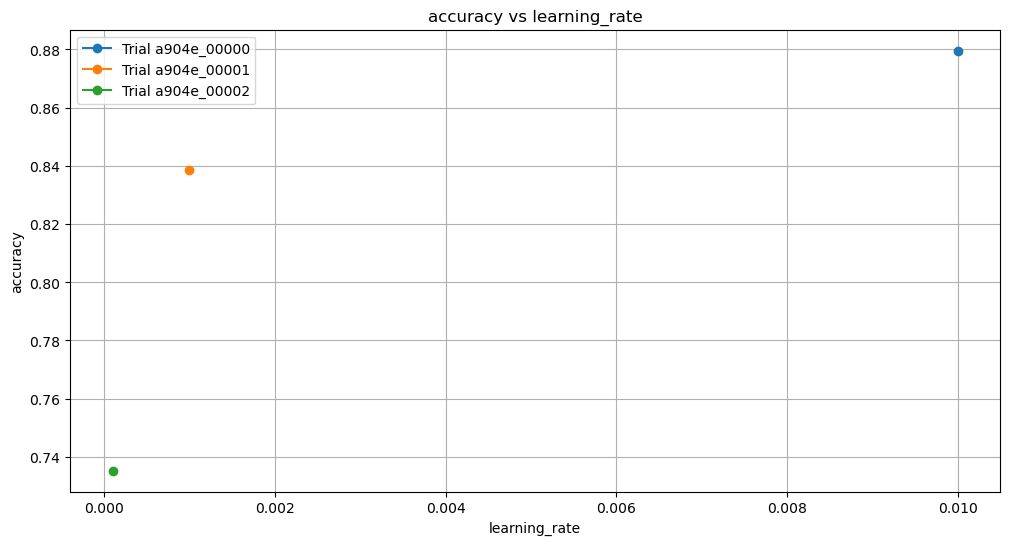

In [13]:
FMM.plot_analysis_results(analysis, x_axis="learning_rate", y_axis="accuracy")

In [14]:
# Print the best hyperparameters and results
best_config = analysis.best_config
print("Best hyperparameters:", best_config)
print("Best accuracy:", analysis.best_result["accuracy"])

Best hyperparameters: {'learning_rate': 0.01}
Best accuracy: 0.8795999884605408


In [15]:
optimizer = tf.keras.optimizers.Adagrad(**best_config)
model = FMM.create_model_v1()
print(f"Training with {optimizer.__class__.__name__} optimizer...")
history = FMM.compile_and_train(
    model, X_train, y_train, optimizer
)

Training with Adagrad optimizer...
Epoch 1/30
750/750 [==============================] - 10s 12ms/step - loss: 0.6986 - accuracy: 0.7644 - val_loss: 0.5162 - val_accuracy: 0.8207
Epoch 2/30
750/750 [==============================] - 9s 12ms/step - loss: 0.4790 - accuracy: 0.8351 - val_loss: 0.4606 - val_accuracy: 0.8378
Epoch 3/30
750/750 [==============================] - 8s 11ms/step - loss: 0.4367 - accuracy: 0.8481 - val_loss: 0.4300 - val_accuracy: 0.8453
Epoch 4/30
750/750 [==============================] - 9s 12ms/step - loss: 0.4116 - accuracy: 0.8559 - val_loss: 0.4099 - val_accuracy: 0.8572
Epoch 5/30
750/750 [==============================] - 8s 11ms/step - loss: 0.3927 - accuracy: 0.8621 - val_loss: 0.3979 - val_accuracy: 0.8623
Epoch 6/30
750/750 [==============================] - 8s 10ms/step - loss: 0.3775 - accuracy: 0.8675 - val_loss: 0.4025 - val_accuracy: 0.8592
Epoch 7/30
750/750 [==============================] - 9s 12ms/step - loss: 0.3652 - accuracy: 0.8715 - val

313/313 - 1s - loss: 0.3393 - accuracy: 0.8784 - 1s/epoch - 4ms/step

Training accuracy : 0.9123333096504211
Validation accuracy : 0.8850833177566528
Loss : 0.3392971158027649
Accuracy : 0.8784000277519226



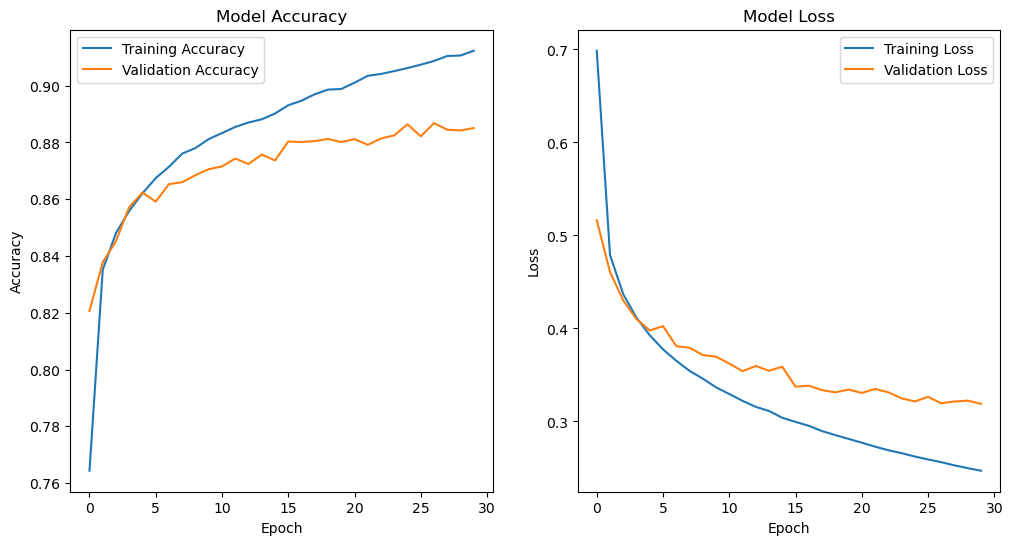

In [16]:
FMM.evaluate(model, X_test, y_test, history)
FMM.plot_history(history)